#Pasos para crear un modelo VAR con series temporales multivariantes:

1. Análisis exploratorios de los datos.
2. Dividir la serie en conjuntos de entrenamiento y prueba.
3. Prueba de estacionariedad.
4. Transformar la serie de entrenamiento si es necesario. 
5. Construir un modelo VAR sobre las series transformadas.
6. Causalidad de Granger.
7. Diagnóstico del modelo.
8. Realizar pronósticos utilizando el modelo finalmente elegido.
9. Transformación inversa del pronóstico a la escala original.
10. Realizar una evaluación del pronóstico.

# Los datos: Yahoo Finance
Si quieres tener los datos de precios, entidades, activos, etc, actualizados a día de hoy, lo puedes hacer de la siguiente manera. Estos datos han sido obtenidos mediante [Yahoo Finance](https://es.finance.yahoo.com/), una plataforma donde puedes ver, obtener, estudiar, analizar y comparar los precios de cierre de diferentes de acciones de los mercados financieros. La forma de obtener los datos de Yahoo Finance en Python es mediante el paquete `yfinance` que tendremos que instalar e importar.

In [1]:
!pip install yfinance
import yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=a6767580719688a48fd0cc15a50371a5d1592fccdf60ed068d247d0cfac392cd
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


## Precios del Oro, Plata, Petróleo, Índice SP500, Cambio USD/EUR y el Índice de rendimiento de bonos del tesoro a 10 años.

In [2]:
raw_data = yfinance.download (tickers = "GC=F, SI=F, EUR=X, CL=F, ^GSPC, ^TNX", start = "2005-01-07", 
                              end = "2020-06-03", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)
raw_data

[*********************100%***********************]  6 of 6 completed


^TNX                ...       CL=F                     
             Open   High    Low  ...        Low      Close    Volume
Date                             ...                                
2005-01-07  4.255  4.313  4.148  ...  44.750000  45.430000   99725.0
2005-01-10  4.270  4.295  4.260  ...  45.200001  45.330002  103573.0
2005-01-11  4.287  4.297  4.238  ...  44.950001  45.680000   90540.0
2005-01-12  4.254  4.271  4.222  ...  45.000000  46.369999  117369.0
2005-01-13  4.236  4.236  4.173  ...  46.299999  48.040001  108475.0
...           ...    ...    ...  ...        ...        ...       ...
2020-05-29  0.664  0.685  0.648  ...  32.360001  35.490002  443647.0
2020-05-31    NaN    NaN    NaN  ...  35.240002  35.299999  186579.0
2020-06-01  0.667  0.687  0.662  ...  34.270000  35.439999  385710.0
2020-06-02  0.685  0.687  0.661  ...  35.279999  36.810001  343483.0
2020-06-03    NaN    NaN    NaN  ...        NaN        NaN       NaN

[4040 rows x 30 columns]

In [3]:
df_comp=raw_data.copy()
df_comp['Gold'] = df_comp['GC=F'].Close[:]
df_comp['Silver'] = df_comp['SI=F'].Close[:]
df_comp['Oil'] = df_comp['CL=F'].Close[:]
df_comp['Treasury'] = df_comp['^TNX'].Close[:]
df_comp['SP500'] = df_comp['^GSPC'].Close[:]
df_comp['USD/EUR'] = df_comp['EUR=X'].Close[:]


In [4]:
df_comp.head()

^TNX                ... Treasury        SP500  USD/EUR
             Open   High    Low  ...                               
Date                             ...                               
2005-01-07  4.255  4.313  4.148  ...    4.285  1186.189941  0.76564
2005-01-10  4.270  4.295  4.260  ...    4.278  1190.250000  0.76278
2005-01-11  4.287  4.297  4.238  ...    4.244  1182.989990  0.76237
2005-01-12  4.254  4.271  4.222  ...    4.236  1187.699951  0.75438
2005-01-13  4.236  4.236  4.173  ...    4.187  1177.449951  0.75694

[5 rows x 36 columns]

In [5]:
del df_comp['GC=F']
del df_comp['SI=F']
del df_comp['CL=F']
del df_comp['^TNX']
del df_comp['^GSPC']
del df_comp['EUR=X']

In [6]:
df_comp.head()

,Gold,Silver,Oil,Treasury,SP500,USD/EUR
,,,,,,
Date,,,,,,
2005-01-07,418.899994,6.429,45.430000,4.285,1186.189941,0.76564
2005-01-10,419.100006,6.431,45.330002,4.278,1190.250000,0.76278
2005-01-11,421.899994,6.623,45.680000,4.244,1182.989990,0.76237
2005-01-12,426.100006,6.728,46.369999,4.236,1187.699951,0.75438
2005-01-13,424.500000,6.730,48.040001,4.187,1177.449951,0.75694


In [7]:
df_comp.isnull().sum()

Gold          182
Silver        178
Oil           177
Treasury      199
SP500         164
USD/EUR        49
dtype: int64

In [8]:
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp.isnull().sum()

Gold          0
Silver        0
Oil           0
Treasury      0
SP500         0
USD/EUR       0
dtype: int64

In [9]:
df_comp.columns = ['Gold', 'Silver', 'Oil', 'Treasury','SP500','USD/EUR']
df_comp.head()

,Gold,Silver,Oil,Treasury,SP500,USD/EUR
Date,,,,,,
2005-01-07,418.899994,6.429,45.430000,4.285,1186.189941,0.76564
2005-01-10,419.100006,6.431,45.330002,4.278,1190.250000,0.76278
2005-01-11,421.899994,6.623,45.680000,4.244,1182.989990,0.76237
2005-01-12,426.100006,6.728,46.369999,4.236,1187.699951,0.75438
2005-01-13,424.500000,6.730,48.040001,4.187,1177.449951,0.75694


In [10]:
#Guardar el dataset
df_comp.to_csv('Market2020.csv')

# Análisis exploratorio

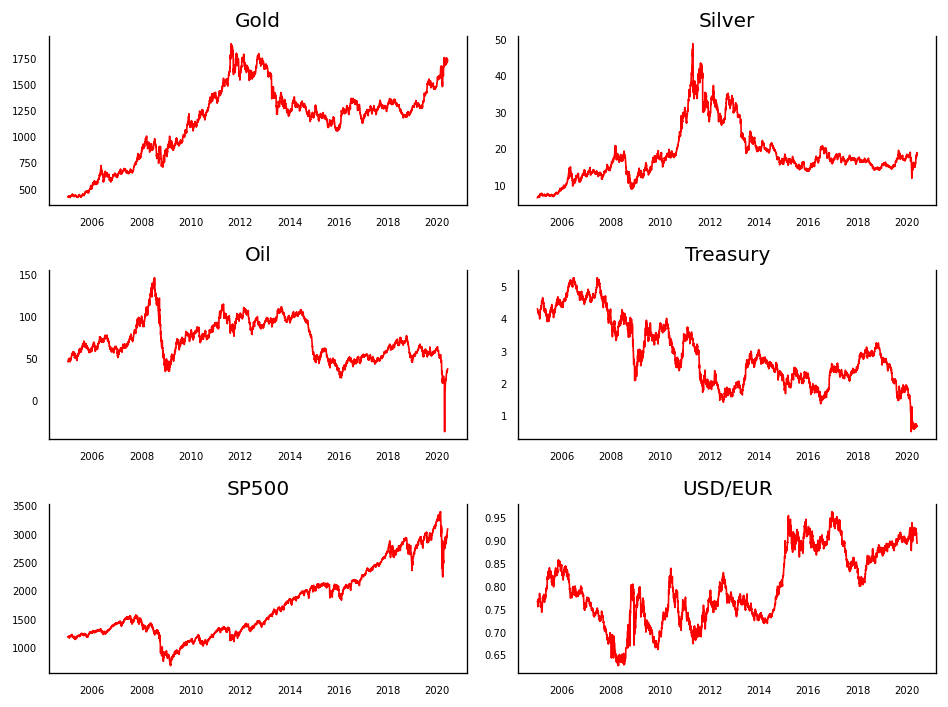

In [11]:
# Plots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
 data = df_comp[df_comp.columns[i]]
 ax.plot(data, color='red', linewidth=1)
 ax.set_title(df_comp.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines['top'].set_alpha(0)
 ax.tick_params(labelsize=6)
 plt.tight_layout();

In [12]:
corr=df_comp.corr()
corr

,Gold,Silver,Oil,Treasury,SP500,USD/EUR
Gold,1.000000,0.790498,0.200295,-0.842096,0.393855,0.165411
Silver,0.790498,1.000000,0.541073,-0.455054,-0.097655,-0.269618
Oil,0.200295,0.541073,1.000000,0.169164,-0.386558,-0.751675
Treasury,-0.842096,-0.455054,0.169164,1.000000,-0.503184,-0.464911
SP500,0.393855,-0.097655,-0.386558,-0.503184,1.000000,0.704583
USD/EUR,0.165411,-0.269618,-0.751675,-0.464911,0.704583,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


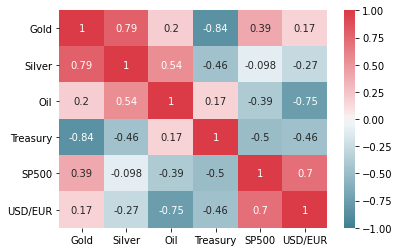

In [13]:
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True,vmax=1, vmin=-1, cmap =sns.diverging_palette(220, 10, as_cmap=True),center=0 )
plt.show()

# Dividir los datos en conjunto de Entrenamiento y Prueba
El modelo VAR se ajustará al conjunto de entrenamiento X_train y luego se utilizará el modelo para pronosticar las próximas 15 observaciones. Estos pronósticos se compararán con los datos reales del conjunto de prueba.

In [14]:
n_obs=15
X_train, X_test = df_comp[0:-n_obs], df_comp[-n_obs:]
print(X_train.shape, X_test.shape)

(4004, 6) (15, 6)


# Prueba de estacionariedad
Necesitamos que los datos sean estacionarios para poder usar el modelo VAR. Vamos a averiguarlo haciendo un Test de Dickey-Fuller aumentado, a cada variable univariante que tiene nuestro dataset.

In [15]:
import statsmodels.tsa.stattools as sts

In [16]:
def augmented_dickey_fuller_statistics(time_series):
  result = sts.adfuller(time_series.values)
  print('p-value: %f' % result[1])

print('Test de Dickey-Fuller Aumentado:')
print('Serie de tiempo Precio del Oro')
augmented_dickey_fuller_statistics(X_train['Gold'])
print('Serie de tiempo Precio de la Plata')
augmented_dickey_fuller_statistics(X_train['Silver'])
print('Serie de tiempo Precio del Petróleo')
augmented_dickey_fuller_statistics(X_train['Oil'])
print('Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años')
augmented_dickey_fuller_statistics(X_train['Treasury'])
print('Serie de tiempo Índice SP500')
augmented_dickey_fuller_statistics(X_train['SP500'])
print('Serie de tiempo Cambio USD/EUR')
augmented_dickey_fuller_statistics(X_train['USD/EUR'])

Test de Dickey-Fuller Aumentado:
Serie de tiempo Precio del Oro
p-value: 0.524669
Serie de tiempo Precio de la Plata
p-value: 0.299238
Serie de tiempo Precio del Petróleo
p-value: 0.108492
Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años
p-value: 0.668733
Serie de tiempo Índice SP500
p-value: 0.936546
Serie de tiempo Cambio USD/EUR
p-value: 0.569751


Todos los p-valores son mayores que 0.05, con lo cual no se rechaza la hipótesis nula de que la serie no es estacionaria. Habría que transformar los datos porque no se puede confirmar estacionariedad.

# Transformación de los datos
La aplicación de la primera diferenciación en el conjunto de entrenamiento debería hacer que todas las series 6 sean estacionarias. Sin embargo, este es un proceso iterativo en el que, después de la primera diferenciación, es posible que la serie siga siendo no estacionaria. Tendremos que aplicar una segunda diferencia o transformación logarítmica para estandarizar la serie en tales casos.

In [17]:
X_train_transformed=X_train.diff().dropna()
X_train_transformed.head()

,Gold,Silver,Oil,Treasury,SP500,USD/EUR
Date,,,,,,
2005-01-10,0.200012,0.002,-0.099998,-0.007,4.060059,-0.00286
2005-01-11,2.799988,0.192,0.349998,-0.034,-7.260010,-0.00041
2005-01-12,4.200012,0.105,0.689999,-0.008,4.709961,-0.00799
2005-01-13,-1.600006,0.002,1.670002,-0.049,-10.250000,0.00256
2005-01-14,-1.799988,-0.150,0.340000,0.029,7.070068,0.00648


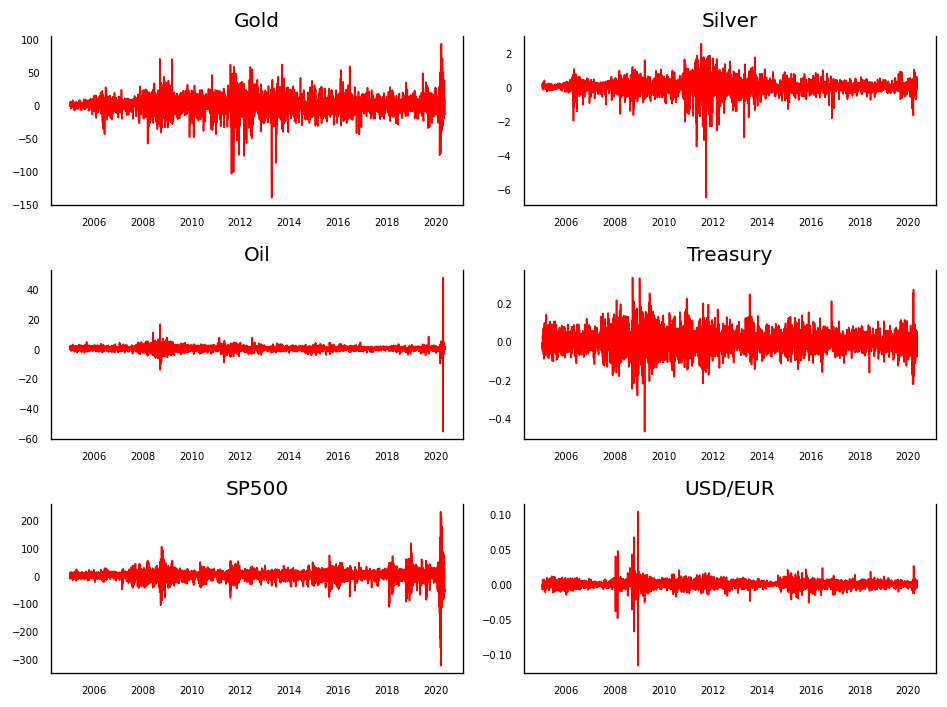

In [18]:
# Dibujemos los datos transformados
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
  d = X_train_transformed[X_train_transformed.columns[i]]
  ax.plot(d, color='red', linewidth=1)
  ax.set_title(df_comp.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines['top'].set_alpha(0)
  ax.tick_params(labelsize=6)
  plt.tight_layout();

Chequeando si los datos transformados (diferenciados) son estacionarios:

In [19]:
print('Test de Dickey-Fuller Aumentado:')
print('Serie de tiempo Precio del Oro Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Gold'])
print('Serie de tiempo Precio de la Plata Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Silver'])
print('Serie de tiempo Precio del Petróleo Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Oil'])
print('Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Treasury'])
print('Serie de tiempo Índice SP500 Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['SP500'])
print('Serie de tiempo Cambio USD/EUR Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['USD/EUR'])

Test de Dickey-Fuller Aumentado:
Serie de tiempo Precio del Oro Diferenciada
p-value: 0.000000
Serie de tiempo Precio de la Plata Diferenciada
p-value: 0.000000
Serie de tiempo Precio del Petróleo Diferenciada
p-value: 0.000000
Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años Diferenciada
p-value: 0.000000
Serie de tiempo Índice SP500 Diferenciada
p-value: 0.000000
Serie de tiempo Cambio USD/EUR Diferenciada
p-value: 0.000000


Todos los p-valores son < 0.05 por lo tanto se podría concluir que con un solo orden de diferenciación se obtienen series estacionarias.

# Modelo VAR
VAR requiere la estacionariedad de la serie, lo que significa que la media de la serie no cambia con el tiempo (podemos verlo en el gráfico dibujado junto a la Prueba de Dickey-Fuller aumentada).

In [20]:
from statsmodels.tsa.api import VAR

In [21]:
model = VAR(X_train_transformed)

## Seleccionando el orden del modelo

In [22]:
modelsel=model.select_order(15)
modelsel.summary()

,AIC,BIC,FPE,HQIC
0,-6.430,-6.421,0.001612,-6.427
1,-6.599,-6.533*,0.001362,-6.576
2,-6.624,-6.501,0.001328,-6.580*
3,-6.622,-6.442,0.001330,-6.558
4,-6.623,-6.387,0.001329,-6.539
5,-6.618,-6.325,0.001336,-6.514
6,-6.634,-6.284,0.001315,-6.510
7,-6.665,-6.258,0.001275,-6.521
8,-6.671,-6.207,0.001267,-6.507
9,-6.683,-6.163,0.001252,-6.499


## Ajustando el modelo

In [23]:
res = model.fit(maxlags=15, ic='aic')
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 21, Sep, 2020
Time:                     07:38:07
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -5.83698
Nobs:                     3988.00    HQIC:                  -6.39293
Log likelihood:          -20050.0    FPE:                 0.00123307
AIC:                     -6.69829    Det(Omega_mle):      0.00107695
--------------------------------------------------------------------
Results for equation Gold
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.279373         0.210003            1.330           0.183
L1.Gold             -0.049775         0.025475           -1.954           0.051
L1.Silver            0.854758         0.791645            1.080  

# Causalidad de Granger

Si el p-valor < 0.05 Rechazo la hipótesis nula H0 y mantengo la variable dentro del modelo.

### Gold

In [24]:
grangercaus=res.test_causality(['Silver', 'Oil', 'Treasury','SP500','USD/EUR'],['Gold'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
3.479,1.284,0.000,"(75, 23382)"


### Silver

In [25]:
grangercaus=res.test_causality(['Gold', 'Oil', 'Treasury','SP500','USD/EUR'],['Silver'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.834,1.284,0.000,"(75, 23382)"


### Oil

In [26]:
grangercaus=res.test_causality(['Gold','Silver','Treasury','SP500','USD/EUR'],['Oil'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
2.240,1.284,0.000,"(75, 23382)"


### Treasury

In [27]:
grangercaus=res.test_causality(['Gold','Silver','Oil','SP500','USD/EUR'],['Treasury'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
2.293,1.284,0.000,"(75, 23382)"


### SP500

In [28]:
grangercaus=res.test_causality(['Gold','Silver','Oil','Treasury','USD/EUR'],['SP500'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
3.658,1.284,0.000,"(75, 23382)"


### USD/EUR

In [29]:
grangercaus=res.test_causality(['Gold','Silver','Oil','Treasury','SP500'],['USD/EUR'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.653,1.284,0.000,"(75, 23382)"


# Matriz de causalidad de Granger

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=15
test = 'ssr_chi2test'
def grangers_causality_matrix(X_train_transformed, variables, test = 'ssr_chi2test', verbose=False):
  dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in dataset.columns:
    for r in dataset.index:
      test_result = grangercausalitytests(X_train_transformed[[r,c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: 
        print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      dataset.loc[r,c] = min_p_value
  dataset.columns = [var + '_x' for var in variables]
  dataset.index = [var + '_y' for var in variables]
  return dataset
grangers_causality_matrix(X_train_transformed, variables = X_train_transformed.columns)

,Gold_x,Silver_x,Oil_x,Treasury_x,SP500_x,USD/EUR_x
Gold_y,1.0000,0.0012,0.0000,0.0000,0.0000,0.1207
Silver_y,0.0000,1.0000,0.0001,0.0057,0.0000,0.0355
Oil_y,0.0000,0.0000,1.0000,0.0007,0.0000,0.0006
Treasury_y,0.0017,0.0261,0.0180,1.0000,0.0023,0.0077
SP500_y,0.0000,0.1739,0.0000,0.0091,1.0000,0.0158
USD/EUR_y,0.0000,0.0000,0.0000,0.0005,0.0003,1.0000


# Diagnosis del modelo

## Residuos

In [31]:
residuals=res.resid

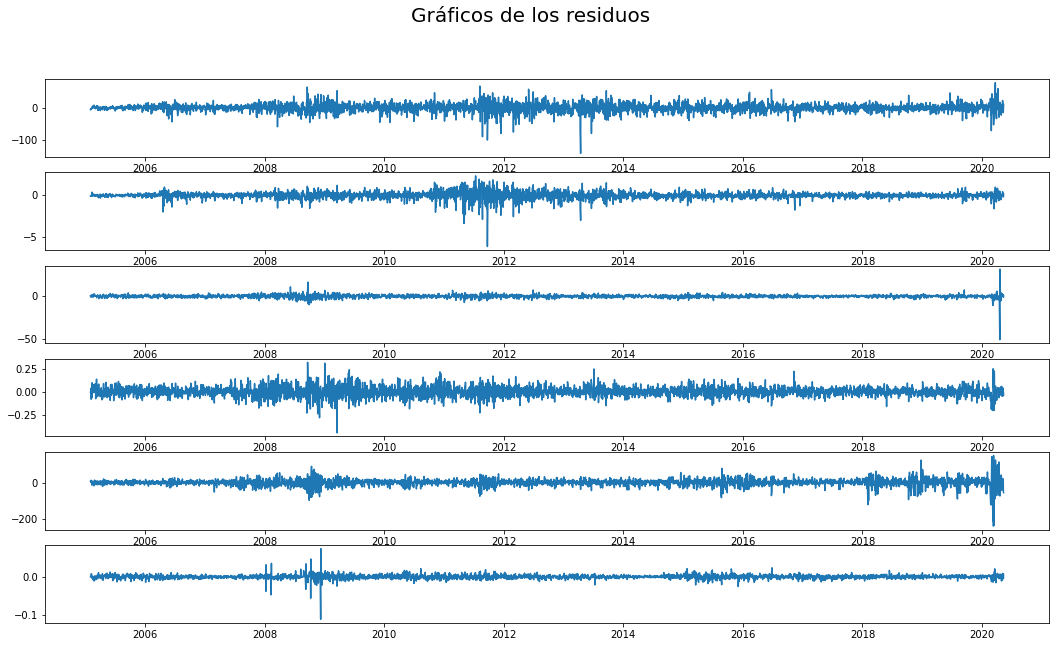

In [32]:
fig, axs = plt.subplots(6)
fig.suptitle('Gráficos de los residuos',fontsize=20)
fig.set_size_inches(18, 10)
[axs[i].plot(residuals.iloc[:,i]) for i in range(6)]
plt.show()

## Dickey - Fuller a los residuos

In [33]:
print('Gold Silver Oil Treas. SP500 USD/EUR')
[sts.adfuller(residuals.iloc[:,i])[1] for i in range(6)]


Gold Silver Oil Treas. SP500 USD/EUR


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Todos los p-valores son < 0.05 por tanto se rechaza la hipótesis nula de que las 6 series de residuos no son estacionarias, por lo cual con un 95% de confianza se cree que son estacionarias. 

## ACF de los Residuos

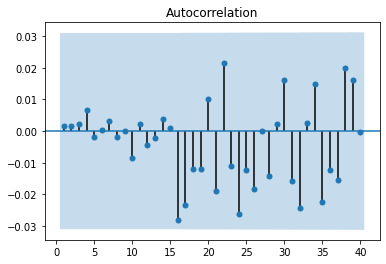

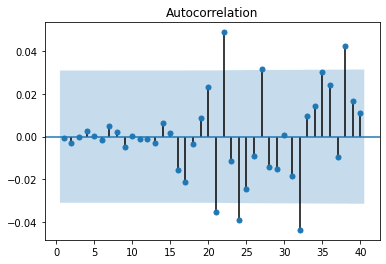

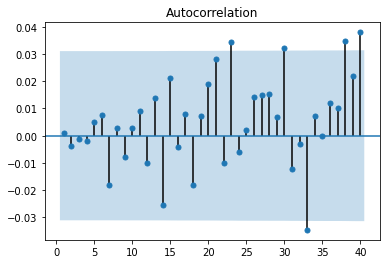

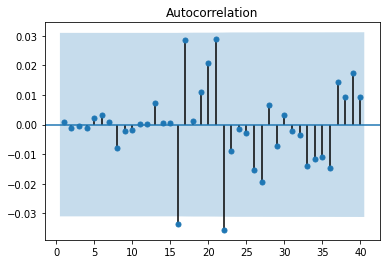

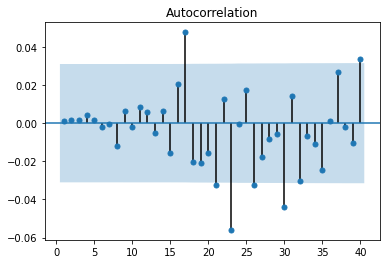

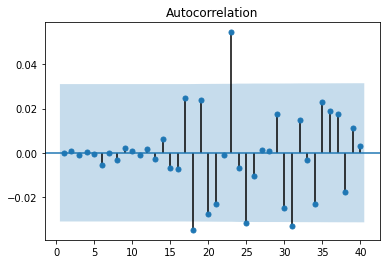

In [34]:
import statsmodels.graphics.tsaplots as sgt
[sgt.plot_acf(residuals.iloc[:,i], zero = False, lags = 40) for i in range(6)]
plt.show()


Conclusión: Los residuos del modelo no presentan estructura de autocorrelación, son estacionarios según los resultados de la prueba de Dickey - Fuller aumentada y en los gráficos se puede comprobar esto visualmente, entonces puede concluirse que son ruido blanco como es deseable.

## Valores predichos

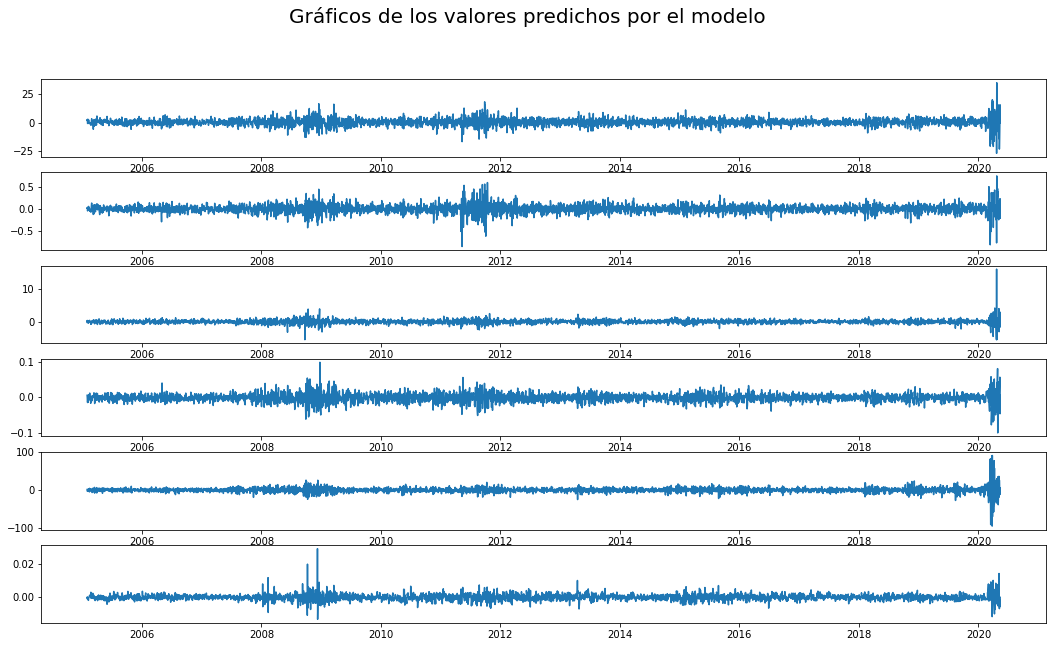

In [35]:
y_fitted = res.fittedvalues
fig, axs = plt.subplots(6)
fig.suptitle('Gráficos de los valores predichos por el modelo',fontsize=20)
fig.set_size_inches(18, 10)
[axs[i].plot(y_fitted.iloc[:,i]) for i in range(6)]
plt.show()

# Pronósticos a futuro

## Hallando los pronósticos

Para pronosticar, al modelo VAR le podemos pasar hasta el número de orden de retraso de observaciones de los datos pasados. Esto se debe a que los términos en el modelo VAR son esencialmente los retrasos de las diversas series de tiempo en el conjunto de datos, por lo que debemos proporcionar tantos valores anteriores como lo indique el orden de retraso utilizado por el modelo. De lo contrario estaríamos introduciendo poca fiabilidad.


In [36]:
# Obtener el orden del modelo
lag_order = res.k_ar
print('Orden del modelo:', lag_order)
# Input data para hacer forecasting (pronósticos a futuro)
input_data = X_train_transformed.values[-lag_order:]
# Forecasting
pred = res.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print('Predicciones:')
pred

Orden del modelo: 15
Predicciones:


,Gold_pred,Silver_pred,Oil_pred,Treasury_pred,SP500_pred,USD/EUR_pred
Date,,,,,,
2020-05-14,4.084676,0.102004,0.631592,-0.017496,2.825496,0.000644
2020-05-15,1.915744,0.148501,-0.126144,-0.007590,-6.976889,-0.000015
2020-05-18,-9.032682,-0.187632,-0.366744,0.030273,-3.892533,0.000259
2020-05-19,-3.025043,0.008641,0.138786,0.004969,7.093515,-0.002121
2020-05-20,4.541656,0.177239,-0.745127,-0.003230,6.286912,0.000662
2020-05-21,-1.727677,-0.180402,-0.300941,0.000856,-9.264910,0.000108
2020-05-22,1.230970,-0.062769,1.150780,0.007573,0.635230,-0.002832
2020-05-25,7.482230,0.157497,-0.716430,-0.009085,-1.176977,-0.000287
2020-05-26,3.989960,0.084640,0.138420,-0.030753,-8.878121,0.001339


<Figure size 864x720 with 0 Axes>

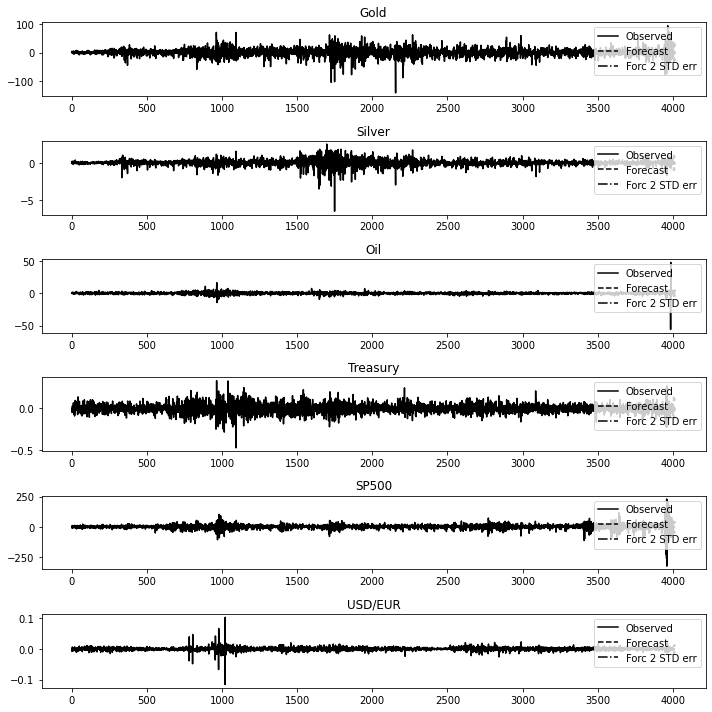

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
res.plot_forecast(15)
plt.tight_layout(h_pad = 1.15)
plt.show()

## Invirtiendo la transformación de los pronósticos a la escala original

Los pronósticos se generan en la escala de los datos de entrenamiento utilizados por el modelo, es decir, son datos transformados. Entonces, para volver a ponerlos en su escala original, necesitamos des-diferenciarlos.
La forma de invertir la diferenciación es sumar estas diferencias consecutivamente al número base. Una forma sencilla de hacerlo es determinar primero la suma acumulada y luego sumarla al número base.
Este proceso se puede revertir agregando la observación en el paso de tiempo anterior al difference value. inverted(ts) = differenced(ts) + observation(ts-1)

In [38]:
# Invirtiendo la transformación
def invert_transformation(X_train, pred):
  forecast = pred.copy()
  columns = X_train.columns
  for col in columns:
    forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
  return forecast

output = invert_transformation(X_train, pred)
output


,Gold_pred,Silver_pred,Oil_pred,Treasury_pred,SP500_pred,USD/EUR_pred
Date,,,,,,
2020-05-14,1717.984700,15.765004,25.921593,0.631504,2822.825496,0.922574
2020-05-15,1719.900444,15.913506,25.795448,0.623914,2815.848607,0.922559
2020-05-18,1710.867762,15.725874,25.428705,0.654187,2811.956074,0.922818
2020-05-19,1707.842719,15.734515,25.567491,0.659156,2819.049590,0.920698
2020-05-20,1712.384375,15.911755,24.822365,0.655926,2825.336502,0.921360
2020-05-21,1710.656698,15.731353,24.521424,0.656783,2816.071592,0.921468
2020-05-22,1711.887668,15.668584,25.672204,0.664356,2816.706822,0.918636
2020-05-25,1719.369897,15.826080,24.955774,0.655271,2815.529845,0.918349
2020-05-26,1723.359858,15.910720,25.094194,0.624518,2806.651724,0.919688


## Pronósticos del Oro

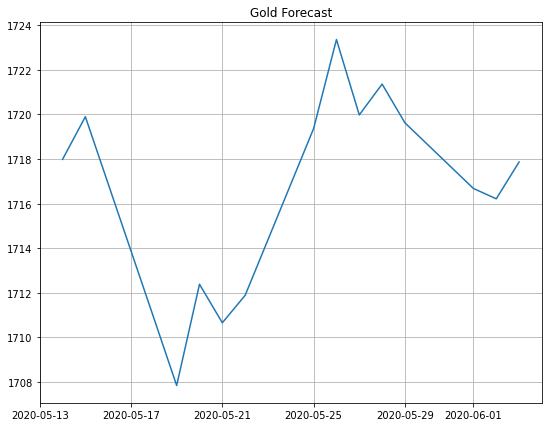

In [39]:
plt.figure(figsize = (9,7))
plt.plot(output.iloc[:,0])
plt.title('Gold Forecast')
plt.grid()
plt.show()

## Comparando los datos pronosticados con el dataset de prueba

In [40]:
combine = pd.concat([output['Gold_pred'], X_test['Gold']], axis=1)
combine = combine.round(decimals=2)
combine = combine.reset_index()
combine = combine.sort_values(by='Date', ascending=False)

In [41]:
combine

,Date,Gold_pred,Gold
14,2020-06-03,1717.87,1725.2
13,2020-06-02,1716.22,1725.2
12,2020-06-01,1716.68,1737.8
11,2020-05-29,1719.62,1736.9
10,2020-05-28,1721.36,1713.3
9,2020-05-27,1719.98,1710.3
8,2020-05-26,1723.36,1704.8
7,2020-05-25,1719.37,1734.6
6,2020-05-22,1711.89,1734.6
5,2020-05-21,1710.66,1720.5


# Evaluación del modelo

Para evaluar los pronósticos, se puede calcular un conjunto completo de métricas, como MAE y RMSE. 

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean absolute error:', mean_absolute_error(combine['Gold'].values, combine['Gold_pred'].values))
print('Root mean squared error:', np.sqrt(mean_squared_error(combine['Gold'].values, combine['Gold_pred'].values)))

Mean absolute error: 19.194666666666656
Root mean squared error: 21.56328917396414
